In [ ]:
# 코랩 한글 패키기 
!apt-get install -y fonts-nanum > /dev/null
!fc-cache -fv > /dev/null
!rm -rf ~/.cache/matplotlib > /dev/null

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

# minus 표시
mpl.rcParams['axes.unicode_minus']=False
plt.rc('font',family='NanumBarunGothic')

- 데이터 불러오기

In [2]:
# low_memory = False, 출력 정보 생략 
df = pd.read_csv('소상공인시장진흥공단_상가업소정보_의료기관_201909.csv', low_memory=False)
df.shape

(91335, 39)

In [6]:
df.상권업종대분류명.unique()

array(['의료'], dtype=object)

In [4]:
df.loc[df["상권업종대분류명"] == "의료", "상권업종중분류명"].value_counts()

0              병원
1              병원
2              병원
3              병원
4          약국/한약방
           ...   
91330      약국/한약방
91331    의료관련서비스업
91332          병원
91333          병원
91334          병원
Name: 상권업종중분류명, Length: 91335, dtype: object

In [ ]:
shop_type = df["상권업종대분류명"] == "의료"
df.loc[shop_type, "상권업종중분류명"].value_counts()

- 데이터 정보 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91335 entries, 0 to 91334
Data columns (total 39 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   상가업소번호     91335 non-null  int64  
 1   상호명        91335 non-null  object 
 2   지점명        1346 non-null   object 
 3   상권업종대분류코드  91335 non-null  object 
 4   상권업종대분류명   91335 non-null  object 
 5   상권업종중분류코드  91335 non-null  object 
 6   상권업종중분류명   91335 non-null  object 
 7   상권업종소분류코드  91335 non-null  object 
 8   상권업종소분류명   91335 non-null  object 
 9   표준산업분류코드   86413 non-null  object 
 10  표준산업분류명    86413 non-null  object 
 11  시도코드       90956 non-null  float64
 12  시도명        90956 non-null  object 
 13  시군구코드      90956 non-null  float64
 14  시군구명       90956 non-null  object 
 15  행정동코드      91335 non-null  int64  
 16  행정동명       90956 non-null  object 
 17  법정동코드      91280 non-null  float64
 18  법정동명       91280 non-null  object 
 19  지번코드       91335 non-null  int64  
 20  대지구분코드

In [ ]:
df.columns

Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도'],
      dtype='object')

In [ ]:
df.dtypes

상가업소번호         int64
상호명           object
지점명           object
상권업종대분류코드     object
상권업종대분류명      object
상권업종중분류코드     object
상권업종중분류명      object
상권업종소분류코드     object
상권업종소분류명      object
표준산업분류코드      object
표준산업분류명       object
시도코드         float64
시도명           object
시군구코드        float64
시군구명          object
행정동코드          int64
행정동명          object
법정동코드        float64
법정동명          object
지번코드           int64
대지구분코드         int64
대지구분명         object
지번본번지          int64
지번부번지        float64
지번주소          object
도로명코드          int64
도로명           object
건물본번지          int64
건물부번지        float64
건물관리번호        object
건물명           object
도로명주소         object
구우편번호        float64
신우편번호        float64
동정보           object
층정보           object
호정보           object
경도           float64
위도           float64
dtype: object

- 결측치 확인 및 전처리
  - 행 전체 결측치 제거 : df.dropna(axis=0, inplace=True)
  - 열 전체 결측치 제거 : df.dropna(axis=1, inplace=True)
    - 결측치가 많아서 한번에 정리하면 모두 제거되므로 특정 행만 결측치 제거해야함


In [ ]:
df.isnull().sum()

상가업소번호           0
상호명              0
지점명          89989
상권업종대분류코드        0
상권업종대분류명         0
상권업종중분류코드        0
상권업종중분류명         0
상권업종소분류코드        0
상권업종소분류명         0
표준산업분류코드      4922
표준산업분류명       4922
시도코드           379
시도명            379
시군구코드          379
시군구명           379
행정동코드            0
행정동명           379
법정동코드           55
법정동명            55
지번코드             0
대지구분코드           0
대지구분명            0
지번본번지            0
지번부번지        19256
지번주소             0
도로명코드            0
도로명              0
건물본번지            0
건물부번지        80731
건물관리번호           0
건물명          44882
도로명주소            0
구우편번호           12
신우편번호            2
동정보          83929
층정보          47291
호정보          75784
경도               0
위도               0
dtype: int64

In [ ]:
# 위에서 계산한 결측치 수를 reset_index 를 통해 데이터프레임으로 만들어 줍니다.
# df_null_count 변수에 결과를 담아서 head 로 미리보기를 합니다.
df_null_count = df.isnull().sum().reset_index()
df_null_count.columns = ["컬럼명", "결측치수"]
df_null_count.head()

,컬럼명,결측치수
0,상가업소번호,0
1,상호명,0
2,지점명,89989
3,상권업종대분류코드,0
4,상권업종대분류명,0


In [ ]:
# 상위10개 출력 
df_null_head = df_null_count.sort_values(
    by="결측치수", ascending=False).head(9)
df_null_head

,컬럼명,결측치수
2,지점명,89989
34,동정보,83929
28,건물부번지,80731
36,호정보,75784
35,층정보,47291
30,건물명,44882
23,지번부번지,19256
9,표준산업분류코드,4922
10,표준산업분류명,4922


In [ ]:
# 결측치 제거 
drop_columns = df_null_head["컬럼명"].values

print(df.shape)
df = df.drop(columns=drop_columns, axis=1)
print(df.shape)

(91335, 39)
(91335, 30)


- 통계값 확인

In [ ]:
df.describe()

,상가업소번호,시도코드,시군구코드,행정동코드,법정동코드,지번코드,대지구분코드,지번본번지,도로명코드,건물본번지,구우편번호,신우편번호,경도,위도
count,9.133500e+04,90956.000000,90956.000000,9.133500e+04,9.128000e+04,9.133500e+04,91335.000000,91335.000000,9.133500e+04,91335.000000,91323.000000,91333.00000,91335.000000,91335.000000
mean,2.121818e+07,32.586712,32898.381877,3.293232e+09,3.293385e+09,3.293191e+18,1.001336,587.534549,3.293207e+11,251.200482,428432.911085,28085.47698,127.487524,36.624711
std,5.042828e+06,13.045138,12985.393171,1.297387e+09,1.297706e+09,1.297393e+18,0.036524,582.519364,1.297391e+11,477.456487,193292.339066,18909.01455,0.842877,1.041361
min,2.901108e+06,11.000000,11110.000000,1.111052e+09,1.111010e+09,1.111010e+18,1.000000,1.000000,1.111020e+11,0.000000,100011.000000,1000.00000,124.717632,33.219290
25%,2.001931e+07,26.000000,26350.000000,2.635065e+09,2.635011e+09,2.635011e+18,1.000000,162.000000,2.635042e+11,29.000000,302120.000000,11681.00000,126.914297,35.811830
50%,2.211900e+07,41.000000,41117.000000,4.111758e+09,4.111710e+09,4.111711e+18,1.000000,462.000000,4.111743e+11,92.000000,440300.000000,24353.00000,127.084550,37.234652
75%,2.480984e+07,43.000000,43113.000000,4.311370e+09,4.311311e+09,4.311311e+18,1.000000,858.000000,4.311332e+11,257.000000,602811.000000,46044.00000,128.108919,37.507463
max,2.852470e+07,50.000000,50130.000000,5.013061e+09,5.013032e+09,5.013061e+18,2.000000,7338.000000,5.013049e+11,8795.000000,799801.000000,63643.00000,130.909912,38.499659


In [ ]:
# 문자열 포함 
df.describe(include=pd.np.object)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  


,상호명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,시도명,시군구명,행정동명,법정동명,대지구분명,지번주소,도로명,건물관리번호,도로명주소
count,91335,91335,91335,91335,91335,91335,91335,90956,90956,90956,91280,91335,91335,91335,91335,91335
unique,56910,1,1,5,5,34,34,17,228,2791,2822,2,53118,16610,54142,54031
top,리원,S,의료,S01,병원,S02A01,약국,경기도,서구,중앙동,중동,대지,서울특별시 동대문구 제기동 965-1,서울특별시 강남구 강남대로,1123010300109650001031604,서울특별시 동대문구 약령중앙로8길 10
freq,152,91335,91335,60774,60774,18964,18964,21374,3165,1856,874,91213,198,326,198,198


### 그룹화된 요약값 보기 - value_counts
* value_counts 를 사용하면 카테고리 형태의 데이터 갯수를 세어볼 수 있습니다.

In [ ]:
df["시도명"].value_counts()

경기도        21374
서울특별시      18943
부산광역시       6473
경상남도        4973
인천광역시       4722
대구광역시       4597
경상북도        4141
전라북도        3894
충청남도        3578
전라남도        3224
광주광역시       3214
대전광역시       3067
충청북도        2677
강원도         2634
울산광역시       1997
제주특별자치도     1095
세종특별자치시      353
Name: 시도명, dtype: int64

In [ ]:
# normalize=True 옵션을 사용하면 비율을 구할 수 있습니다.
df["시도명"].value_counts(normalize=True)

경기도        0.234993
서울특별시      0.208266
부산광역시      0.071166
경상남도       0.054675
인천광역시      0.051915
대구광역시      0.050541
경상북도       0.045528
전라북도       0.042812
충청남도       0.039338
전라남도       0.035446
광주광역시      0.035336
대전광역시      0.033720
충청북도       0.029432
강원도        0.028959
울산광역시      0.021956
제주특별자치도    0.012039
세종특별자치시    0.003881
Name: 시도명, dtype: float64

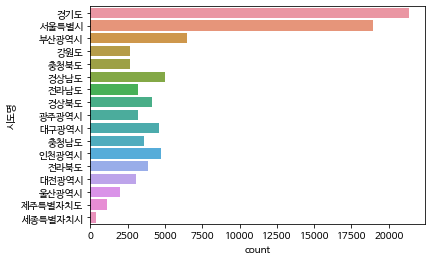

In [62]:
sns.countplot(data=df, y="시도명")

## 자율주제(과제)
* 언어치료는 시군구별로 어디에 많이 위치할까?

In [63]:
df.columns

Index(['상가업소번호', '상호명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드', '상권업종중분류명',
       '상권업종소분류코드', '상권업종소분류명', '시도코드', '시도명', '시군구코드', '시군구명', '행정동코드',
       '행정동명', '법정동코드', '법정동명', '지번코드', '대지구분코드', '대지구분명', '지번본번지', '지번주소',
       '도로명코드', '도로명', '건물본번지', '건물관리번호', '도로명주소', '구우편번호', '신우편번호', '경도',
       '위도'],
      dtype='object')

In [66]:
df.상권업종소분류명.unique()

array(['산부인과', '내과/외과', '신경외과', '기타병원', '약국', '동물병원', '한약방', '탕제원',
       '정형/성형외과', '소아과', '이비인후과의원', '노인/치매병원', '언어치료', '수의업-종합', '한의원',
       '치과의원', '침구원', '일반병원', '안과의원', '조산원', '한방병원', '종합병원', '유사의료업기타',
       '응급구조대', '혈액원', '치과병원', '척추교정치료', '피부과', '비뇨기과', '치과기공소', '산후조리원',
       '접골원', '수의업-기타', '제대혈'], dtype=object)

In [82]:
df_speak = df[df['상권업종소분류명'] == '언어치료']
df_speak.head(2)

,상가업소번호,상호명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,시도코드,시도명,시군구코드,시군구명,행정동코드,행정동명,법정동코드,법정동명,지번코드,대지구분코드,대지구분명,지번본번지,지번주소,도로명코드,도로명,건물본번지,건물관리번호,도로명주소,구우편번호,신우편번호,경도,위도
22,21013731,세종언어치료센터,S,의료,S03,유사의료업,S03B07,언어치료,26.0,부산광역시,26410.0,금정구,2641068000,구서1동,2.641011e+09,구서동,2641010700200840001,1,대지,84,부산광역시 금정구 구서동 84-1,264102000010,부산광역시 금정구 중앙대로,1817,2641010700100840001017686,부산광역시 금정구 중앙대로 1817-11,609310.0,46273.0,129.091662,35.246528
108,21914637,태화아동발달지원센터,S,의료,S03,유사의료업,S03B07,언어치료,30.0,대전광역시,30140.0,중구,3014072000,문화1동,3.014012e+09,문화동,3014011600200270000,1,대지,27,대전광역시 중구 문화동 27,301404295402,대전광역시 중구 보문산로333번길,29,3014011600100270000008172,대전광역시 중구 보문산로333번길 29,301130.0,35020.0,127.412725,36.312953


### 전국 시도별 언어치료 

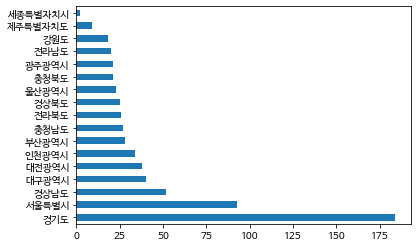

In [81]:
df_speak['시도명'].value_counts().plot.barh()

Text(0.5, 1.0, '시도별 언어치료 비율')

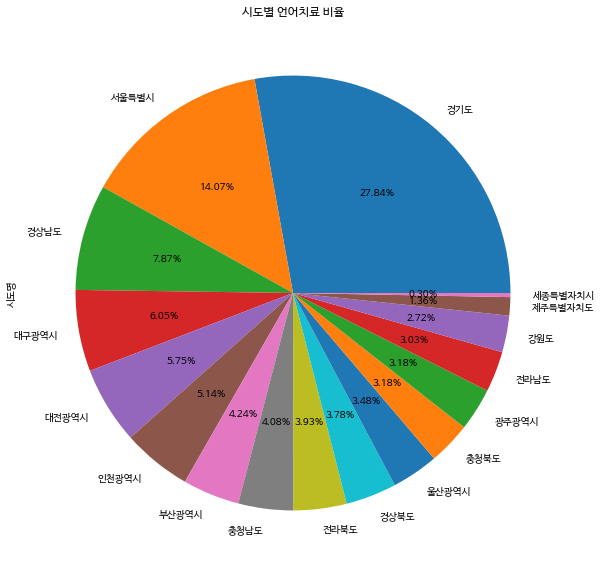

In [91]:
df_speak['시도명'].value_counts().plot.pie(autopct='%.2f%%',figsize=(12,10))
plt.title('시도별 언어치료 비율')

### 서울 시군구별 언어치료 비율

In [93]:
df_speak_seoul= df_speak[df_speak['시도명']=='서울특별시']
df_speak_seoul.head(2)

,상가업소번호,상호명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,시도코드,시도명,시군구코드,시군구명,행정동코드,행정동명,법정동코드,법정동명,지번코드,대지구분코드,대지구분명,지번본번지,지번주소,도로명코드,도로명,건물본번지,건물관리번호,도로명주소,구우편번호,신우편번호,경도,위도
430,20861641,서울언어치료센터,S,의료,S03,유사의료업,S03B07,언어치료,11.0,서울특별시,11710.0,송파구,1171058000,송파1동,1.171010e+09,송파동,1171010400200950055,1,대지,95,서울특별시 송파구 송파동 95-55,117103123001,서울특별시 송파구 가락로,139,1171010400100950055013236,서울특별시 송파구 가락로 139-1,138170.0,5668.0,127.111360,37.502574
481,20901857,한국아동발달연구소,S,의료,S03,유사의료업,S03B07,언어치료,11.0,서울특별시,11350.0,노원구,1135067000,상계5동,1.135010e+09,상계동,1135010500201730001,1,대지,173,서울특별시 노원구 상계동 173-1,113503110009,서울특별시 노원구 한글비석로,396,1135010500101730001001304,서울특별시 노원구 한글비석로 396,139748.0,1663.0,127.073564,37.662292


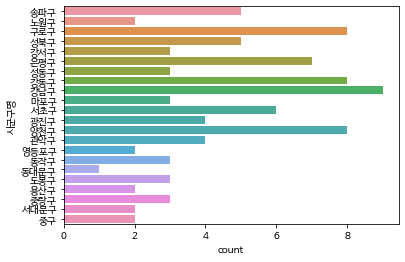

In [96]:
sns.countplot(data= df_speak_seoul, y='시군구명')

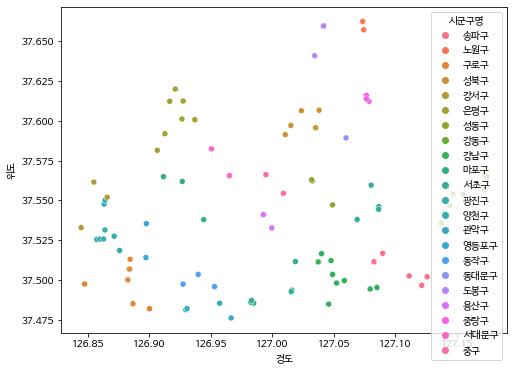

In [103]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_speak_seoul, 
                x='경도', y='위도', hue='시군구명')

## 과제(2)
- 의료시설은 서울과 강남에 집중되어 있을까?

In [106]:
df.상권업종중분류명.unique()

array(['병원', '약국/한약방', '수의업', '유사의료업', '의료관련서비스업'], dtype=object)

In [135]:
df_fac = df.groupby('시도명')['상권업종대분류명'].count().to_frame()
df_fac = df_fac.sort_values('상권업종대분류명', ascending=False)
df_fac.columns=['의료시설 수']
df_fac

,의료시설 수
시도명,
경기도,21374
서울특별시,18943
부산광역시,6473
경상남도,4973
인천광역시,4722
대구광역시,4597
경상북도,4141
전라북도,3894
충청남도,3578


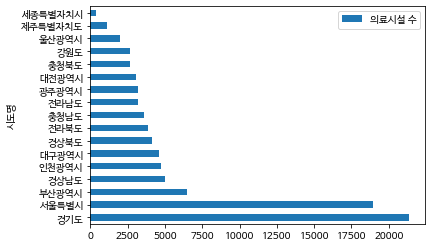

In [136]:
df_fac.plot.barh()

In [7]:
df['도로명주소'][0]

'경기도 안산시 단원구 달미로 10'

In [9]:
street = df['도로명주소'][0].split()
street

['경기도', '안산시', '단원구', '달미로', '10']

In [12]:
street[0]+ ' ' + street[1]

'경기도 안산시'

In [16]:
streets = []
for i in df.index :
  street = df['도로명주소'][i].split()
  street = street[0]+ ' ' + street[1]
  streets.append(street)

In [18]:
df['시도군'] = streets

In [19]:
df.head(3)

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,표준산업분류명,시도코드,시도명,시군구코드,시군구명,행정동코드,행정동명,법정동코드,법정동명,지번코드,대지구분코드,대지구분명,지번본번지,지번부번지,지번주소,도로명코드,도로명,건물본번지,건물부번지,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도,시도군
0,19956873,하나산부인과,NaN,S,의료,S01,병원,S01B10,산부인과,Q86201,일반 의원,41.0,경기도,41273.0,안산시 단원구,4127360000,선부3동,4.127311e+09,선부동,4127310900210810000,1,대지,1081,NaN,경기도 안산시 단원구 선부동 1081,412733191011,경기도 안산시 단원구 달미로,10,NaN,4127310900110810000010857,산호한양아파트,경기도 안산시 단원구 달미로 10,425764.0,15236.0,NaN,NaN,NaN,126.814295,37.336344,경기도 안산시
1,20024149,타워광명내과의원,NaN,S,의료,S01,병원,S01B07,내과/외과,Q86201,일반 의원,11.0,서울특별시,11680.0,강남구,1168065600,도곡2동,1.168012e+09,도곡동,1168011800204670014,1,대지,467,14.0,서울특별시 강남구 도곡동 467-14,116804166604,서울특별시 강남구 언주로30길,39,NaN,1168011800104670014000001,NaN,서울특별시 강남구 언주로30길 39,135270.0,6292.0,NaN,4,NaN,127.053198,37.488742,서울특별시 강남구
2,20152277,조정현신경외과의원,NaN,S,의료,S01,병원,S01B15,신경외과,Q86201,일반 의원,41.0,경기도,41390.0,시흥시,4139059100,정왕1동,4.139013e+09,정왕동,4139013200217400001,1,대지,1740,1.0,경기도 시흥시 정왕동 1740-1,413903199049,경기도 시흥시 중심상가로,178,NaN,4139013200117400001017064,한라프라자,경기도 시흥시 중심상가로 178,429450.0,15066.0,NaN,NaN,NaN,126.734841,37.344955,경기도 시흥시
